In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv') 

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [3]:
df.groupby("category").count().sort_values("uid",ascending=False).head(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth
category,,,,,,,,
Sports & Outdoors,836265,836265,836265,836265,836265,836265,836265,836265
Beauty,19312,19312,19312,19312,19312,19312,19312,19312
"Handmade Clothing, Shoes & Accessories",19229,19229,19229,19229,19229,19229,19229,19229
Bath & Body,19092,19092,19092,19092,19092,19092,19092,19092
Birthday Gifts,18978,18978,18978,18978,18978,18978,18978,18978


<Axes: xlabel='category', ylabel='uid'>

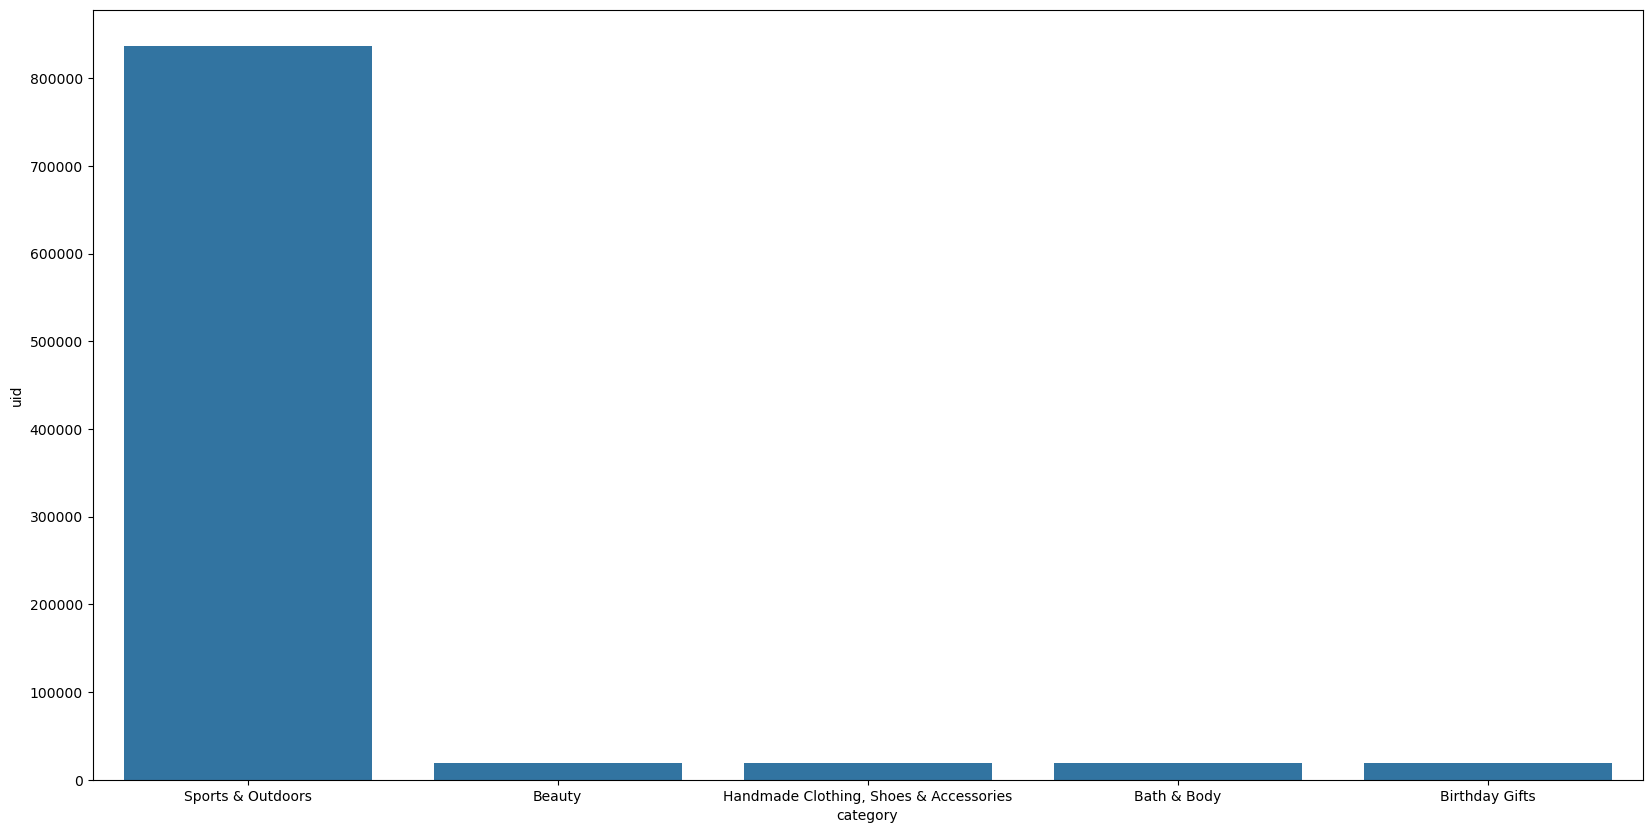

In [4]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df.groupby("category").count().sort_values("uid",ascending=False).head(5),x="category",y="uid")

([<matplotlib.patches.Wedge at 0x23017f99940>,
 [Text(-1.0619894641325325, 0.2866677136886831, 'Sports & Outdoors'),
  Text(0.9852466974708041, -0.48917169288796164, 'Beauty'),
  Text(1.0412846831644893, -0.3545789173188805, 'Handmade Clothing, Shoes & Accessories'),
  Text(1.0788687885174035, -0.21457431617737963, 'Bath & Body'),
  Text(1.0976547688734235, -0.07179142267312413, 'Birthday Gifts')])

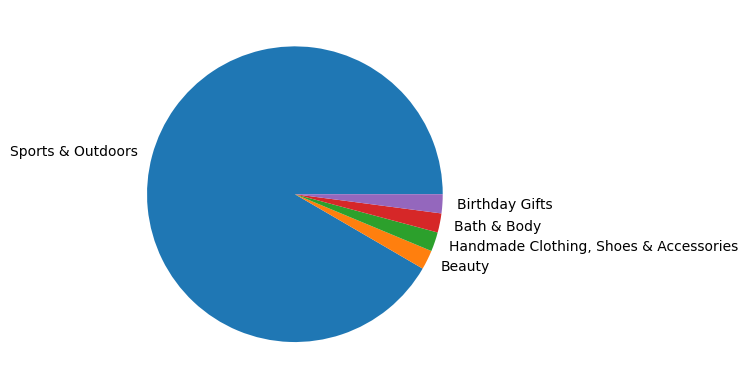

In [5]:
plt.pie(df.groupby("category").count().sort_values("uid",ascending=False).head(5)["uid"],labels=df.groupby("category").count().sort_values("uid",ascending=False).head(5).index)

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 


In [6]:
df["price"].mean()

89.24380943985244

In [7]:
df["price"].median()

19.09

In [8]:
df["price"].mode()

0    9.99
Name: price, dtype: float64

In [9]:
df["price"].var()

119445.48532256528

In [10]:
df["price"].std()

345.60886175352226

In [11]:
q75, q25 = np.percentile(df['price'], [75 ,25])
iqr = q75 - q25
iqr

36.0

In [12]:
df["price"].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [13]:
df["price"].max()

100000.0

In [14]:
dfhist = df[df["price"]<df["price"].max()]

In [20]:
q1 = df['price'].quantile(.25)

q3 = df['price'].quantile(.75)

mask = df['price'].between(q1, q3, inclusive=True)

iqr = df.loc[mask]

C:\Users\javie\AppData\Local\Temp\ipykernel_19576\935380171.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  mask = df['price'].between(q1, q3, inclusive=True)


<Axes: xlabel='price', ylabel='Count'>

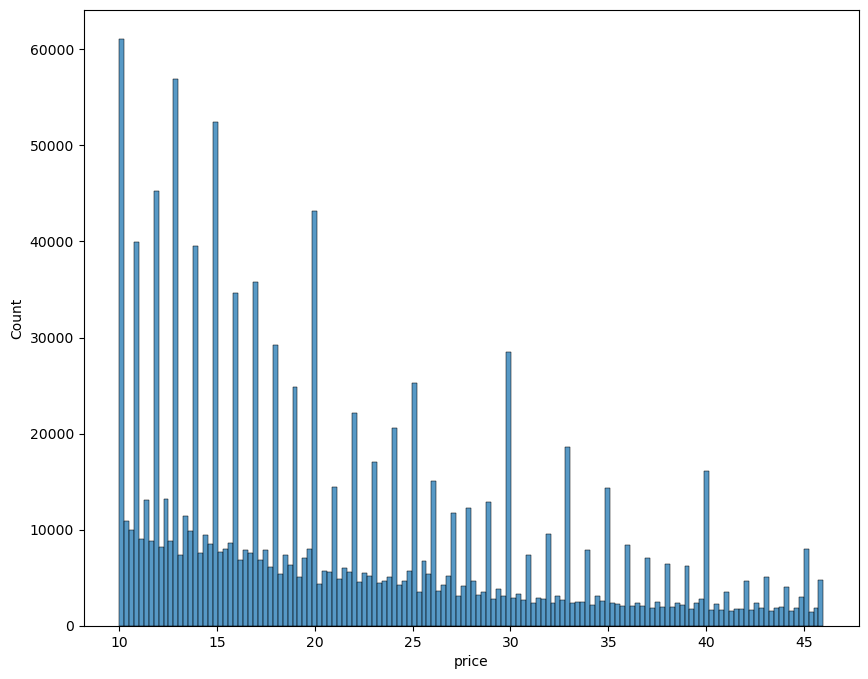

In [21]:
plt.figure(figsize=(10, 8))
sns.histplot(data=iqr, x="price")

Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [24]:
df["stars"].mean()
df["stars"].median()
df["stars"].mode()
df["stars"].var()
df["stars"].std()
q75, q25 = np.percentile(df['stars'], [75 ,25])
iqr = q75 - q25
df["stars"].skew()
df["stars"].kurt()


-1.9260061280432985

<Axes: xlabel='stars', ylabel='Count'>

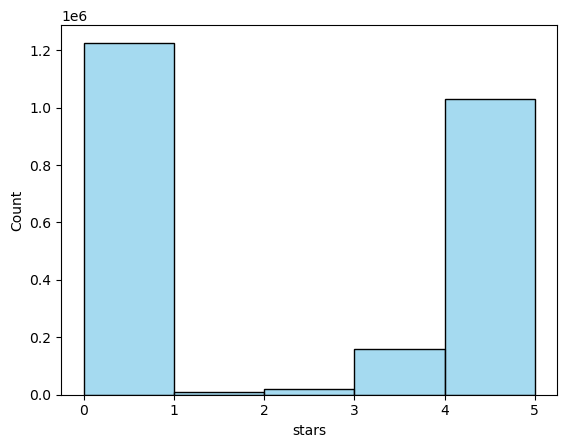

In [25]:
sns.histplot(data=df, x="stars", bins=5, kde=False, color='skyblue', edgecolor='black')